# Classification of Asteroids by Using Logistic Regression

#### by Siddharaj Maramwar

This notebook classifies the asteroids whether they are harmful or not.<br>
There are different features based on which the model classifies the asteroids into class.<br>
For classification I have used Logistic Regression which is a special case of Linear Regression.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Dataset
I'm using original dataset which is provided by **NASA** <br>
Get the dataset [here](https://www.kaggle.com/shrutimehta/nasa-asteroids-classification)

In [2]:
df = pd.read_csv("C:/Users/Sddhraj/Desktop/Classifying the Asteroids using ML  1/Dataset/nasa.csv")

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Exploratory Data Analysis

1) Dropping the unwanted columns

In [4]:
#Let's get the columns of our dataset
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

It's Hugeeeeee... <br>
Let's trim down the unwanted ones.

In [5]:
df.drop(['Neo Reference ID', 'Name','Est Dia in M(min)', 'Est Dia in M(max)','Close Approach Date',
       'Epoch Date Close Approach','Est Dia in Miles(max)','Est Dia in Miles(min)','Est Dia in Feet(min)', 'Est Dia in Feet(max)',
        'Relative Velocity km per sec','Epoch Date Close Approach', 'Orbit Determination Date', 'Orbiting Body', 'Equinox','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)','Miles per hour','Est Dia in KM(max)'], axis=1, inplace=True)

In [6]:
#check for missing values
print(df.isnull().sum())

Absolute Magnitude             0
Est Dia in KM(min)             0
Relative Velocity km per hr    0
Miss Dist.(Astronomical)       0
Orbit ID                       0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64


2) Label Encoding

In [7]:
# Here encoding the 'Hazardous' column.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
df['Hazardous'] = le.fit_transform(df['Hazardous'])

In [9]:
df['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

Here we see there are 755 hazardous and 3932 not-hazardous

We can easily see the dataset is quite imbalanced. <br>
Let's check using some visuals.

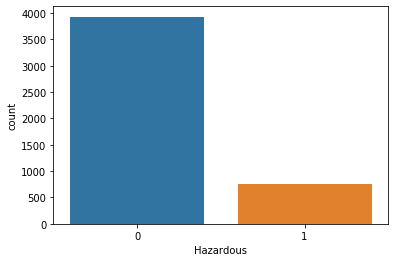

In [10]:
sns.countplot(df['Hazardous'])

Clearly the dataset shows the difference by large margins.<br>
Resampling is to be done on this dataset.<br>
Let's dive into it.

3) Resampling

In [11]:
not_hazard = df[df['Hazardous'] == 0]

In [12]:
not_hazard.shape

(3932, 21)

In [13]:
hazard = df[df['Hazardous'] == 1]

In [14]:
hazard.shape

(755, 21)

In [15]:
df = pd.concat([not_hazard[:1000],hazard], axis=0)

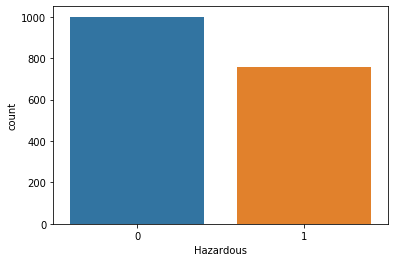

In [16]:
sns.countplot(df['Hazardous'])

Now it looks a bit balanced.

Before building model directly there are certain things that should be taken under consideration.

#### Correlation Check

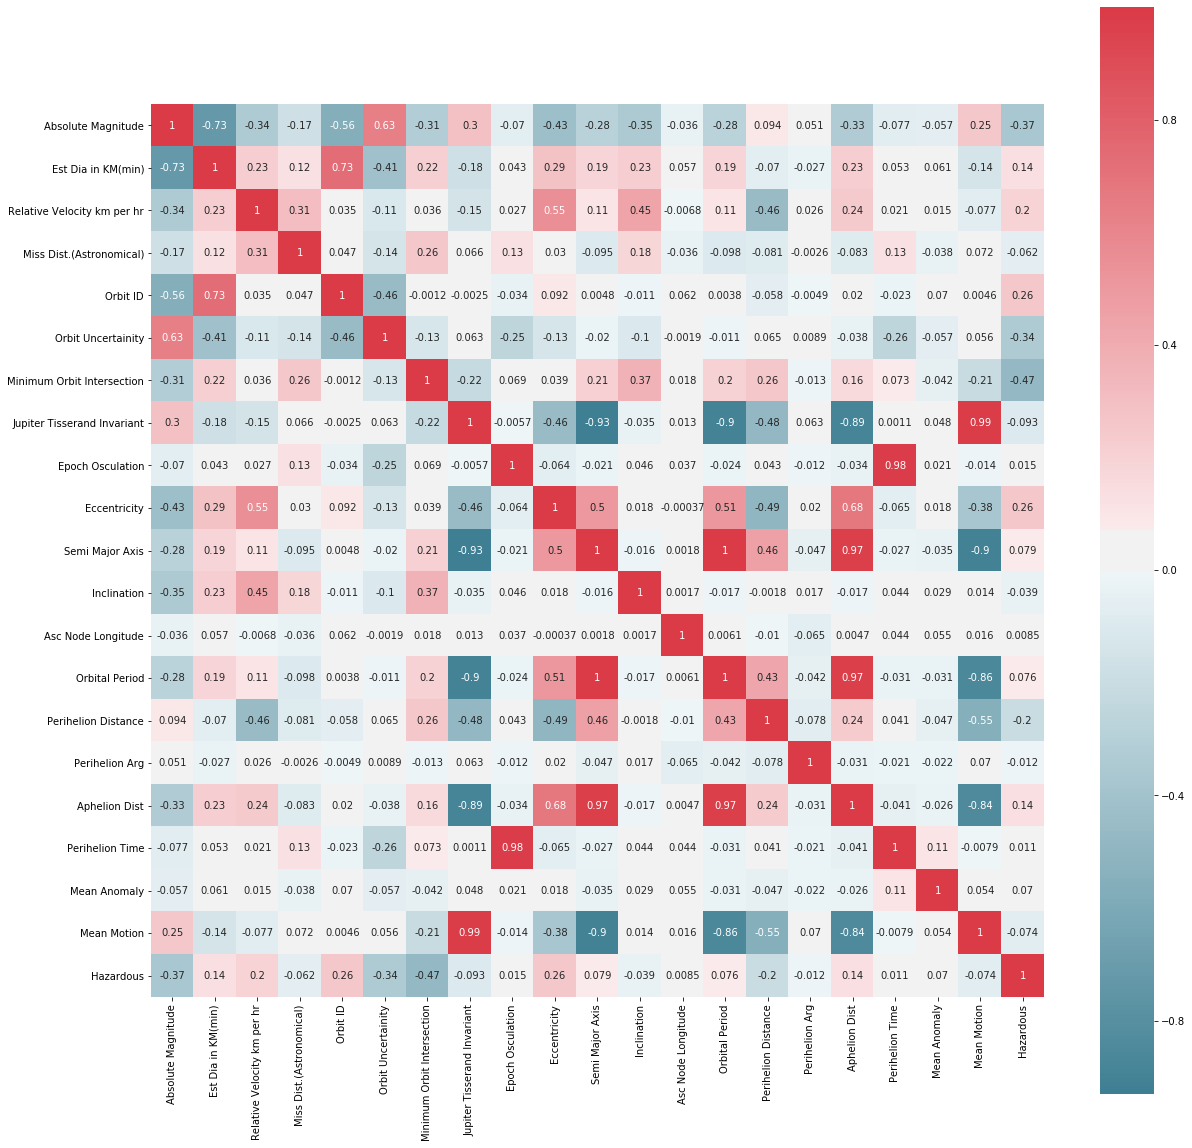

In [17]:
# heatplot
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Everything looks good !!

### Model Building

In [18]:
# separating the classlabel from the features  
y = df.Hazardous.values
X = df.drop(['Hazardous'],axis=1)

### Normalizing Variables
If the values of feature variables are too large then they end up contributing more to the target variables even if they are not related. That’s why we must normalize them before implementing the algorithm on them.The library we will use to perform this is called Standard Scaler.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X = sc.fit_transform(X) 

In [22]:
X[:2]

array([[ 0.03826206, -0.37442003,  0.3539568 ,  0.76632374, -0.38346206,
         0.29157787,  1.47146209,  0.22190705,  0.22005277, -0.28281672,
        -0.47117332,  1.29953097, -0.37694182, -0.49031058, -0.15069896,
         1.2618344 , -0.47523068, -0.00311567, -0.11958224,  0.19482985],
       [ 2.43824406, -0.80585627, -0.57844015,  0.05754735, -0.71148013,
         1.43636346, -0.75388262, -0.07025536,  0.22005277, -1.01593167,
        -0.17359012, -0.56394959, -1.15435728, -0.23590362,  0.9646261 ,
        -1.62533329, -0.44171201,  0.10826864, -1.13571373, -0.22393209]])

Split the dataset into training and test set using train_test_split function.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Using Logistic Regression for model building.

In [25]:
from sklearn.linear_model import LogisticRegression
import time

In [26]:
lr = LogisticRegression()

start_time = time.time()

lr.fit(X_train,y_train)

delta_time = (time.time() - start_time)


C:\Users\Sddhraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
y_predict = lr.predict(X_test)

### Model Evaluation

In [28]:
from sklearn.metrics import classification_report

In [29]:
print("---------- TRAINING TIME --------------")
print("     ",delta_time)

print("                                ")
print("                                ")
print("-------- Classification Report --------")
print("                                ")
print("                                ")
print(classification_report(y_test,y_predict))

---------- TRAINING TIME --------------
      0.009006738662719727
                                
                                
-------- Classification Report --------
                                
                                
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       252
           1       0.91      0.94      0.92       187

    accuracy                           0.93       439
   macro avg       0.93      0.93      0.93       439
weighted avg       0.93      0.93      0.93       439



## Thank You for Reading